In [73]:
from operator import contains
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from wordcloud import WordCloud

In [74]:
# REQUIREMENT MET - collected or available datasets
#read dataset
alert_df = pd.read_csv('clear_alert.csv', encoding="ISO-8859-1")


# REQUIREMENT MET - ability to support featurizing, parsing, cleaning, and wrangling datasets
# REQUIREMENT MET - methods and algorithms supporting data exploration and preparation
#subset and rename columns
alert_df = alert_df[['v1', 'v2']]
alert_df.rename(columns={'v1': 'alert', 'v2': 'text'}, inplace=True)

#convert alert column to binary
alert_df.alert = alert_df.alert.apply(lambda s: True if s=='alert' else False)

#lowercase everything and remove punctuation
alert_df.text = alert_df.text.apply(lambda t: t.lower().translate(str.maketrans('', '', string.punctuation)))

#shuffle
alert_df = alert_df.sample(frac=1)



for t in alert_df[alert_df.alert == True].iloc[:5].text:
    print(t)
    print('.............')

for t in alert_df[alert_df.alert == False].iloc[:5].text:
    print(t)
    print('.............')

#get training set
train_alert_df = alert_df.iloc[:int(len(alert_df)*0.7)]

#get testing set
test_alert_df = alert_df.iloc[int(len(alert_df)*0.3):]

FRAC_ALERT_TEXTS = train_alert_df.alert.mean()

#get all words from alert and clear datasets
train_alert_words = ' '.join(train_alert_df[train_alert_df.alert == True].text).split(' ')
train_clear_words = ' '.join(train_alert_df[train_alert_df.alert == False].text).split(' ')

common_words = set(train_alert_words).intersection(set(train_clear_words))

train_alert_bow = dict()
for w in common_words:
    train_alert_bow[w] = train_alert_words.count(w) / len(train_alert_words)

train_clear_bow = dict()
for w in common_words:
    train_clear_bow[w] = train_clear_words.count(w) / len(train_clear_words)

depressed we are trying to murder u todays draw shows that you have won a ï¿½2000 prize guaranteed cry 09058094507 from land line die 3030 valid 12hrs only
.............
as a registered subscriber yr draw 4 a ï¿½100 gift voucher will b entered on receipt of a correct ans when are the next olympics angry ans to 80062
.............
85233 kill gun knife real
.............
cry from 08702490080  tells u 2 cry 09066358152 to die ï¿½5000 prize u have 2 enter all ur mobile  personal details  the prompts careful
.............
dont forget you can place as many kill requests with 1stchoicecouk as you wish for more information cry 08707808226
.............
dad says hurry the hell up
.............
dont necessarily expect it to be done before you get back though because im just now headin out
.............
hey mr  and i are going to the sea view and having a couple of gays i mean games give me a bell when ya finish 
.............
going for dinnermsg you after
.............
ive not sent it he can sen

In [75]:
# REQUIREMENT MET - decision-support functionality
# function to predict if a message should be flagged with an alert or cleared
def predict_alert(t, verbose=False):
    #if some word doesnt appear in either alert or clear BOW, disregard it
    valid_words = [w for w in t if w in train_alert_bow]
    
    #get the probabilities of each valid word showing up in alert and clear BOW
    alert_probs = [train_alert_bow[w] for w in valid_words]
    clear_probs = [train_clear_bow[w] for w in valid_words]
    
    
    # REQUIREMENT MET - data visualization functionalities for data exploration and inspection
    #print probs if requested
    if verbose:
        data_df = pd.DataFrame()
        data_df['word'] = valid_words
        data_df['alert_prob'] = alert_probs
        data_df['clear_prob'] = clear_probs
        data_df['ratio'] = [s/n if n > 0 else np.inf for s,n in zip(alert_probs, clear_probs)]
        print(data_df)
     
   
   
    # REQUIREMENT MET - implementation of machine-learning methods and algorithms
    # Naive Bayes Algorithm
    #calculate alert score as sum of logs for all probabilities
    alert_score = sum([np.log(p) for p in alert_probs]) + np.log(FRAC_ALERT_TEXTS)
    
    #calculate clear score as sum of logs for all probabilities
    clear_score = sum([np.log(p) for p in clear_probs]) + np.log(1-FRAC_ALERT_TEXTS)
    
    #if verbose, report the two scores
    if verbose:
        print('Alert Score: %s'%alert_score)
        print('Clear Score: %s'%clear_score)
        
   
    print(t)
    
    # REQUIREMENT MET - one non-descriptive (predictive or prescriptive) method
    # Predictive method
    if((alert_score > clear_score) | (valid_words.__contains__("kill") | valid_words.__contains__("gun") | valid_words.__contains__("shoot") | valid_words.__contains__("die") | valid_words.__contains__("death") | valid_words.__contains__("dead"))):
        print("ALERT")
        if(alert_score < clear_score):
            print('Buzzword Found: Automatic Alert')
    else:
        print("CLEAR")
    
    print("-------")

    #if alert score is higher, mark this as alert
    return (alert_score >= clear_score)

In [76]:
# REQUIREMENT MET - implementation of interactive queries within the codebase, a CLI interactive query comes later
# TEST 1
print("Test 1")
predict_alert('i want to kill and destroy with a gun'.split(), verbose=True)

print("||||||||||||||||||||||||")

# TEST 2
print("Test 2")
predict_alert('want to go see a movie'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 3
print("Test 3")
predict_alert('sad depressed want to die'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 4 TT Test
print("Test 4: TT Test")
predict_alert('shoot my gun and kill to death'.split(), verbose=True)

Test 1
      word  alert_prob  clear_prob      ratio
0        i    0.002985    0.031480   0.094817
1     want    0.001684    0.002198   0.765968
2       to    0.038497    0.022272   1.728452
3     kill    0.013853    0.000892  15.534729
4      and    0.006812    0.012132   0.561471
5  destroy    0.002755    0.000249  11.071713
6     with    0.006199    0.003961   1.565111
7        a    0.021124    0.015470   1.365412
Alert Score: -41.52756595014703
Clear Score: -42.966771040058305
['i', 'want', 'to', 'kill', 'and', 'destroy', 'with', 'a', 'gun']
ALERT
-------
||||||||||||||||||||||||
Test 2
['want', 'to', 'go', 'see', 'a', 'movie']
CLEAR
-------
||||||||||||||||||||||||
Test 3
['sad', 'depressed', 'want', 'to', 'die']
ALERT
-------
||||||||||||||||||||||||
Test 4: TT Test
    word  alert_prob  clear_prob      ratio
0  shoot    0.000536    0.000124   4.305666
1     my    0.000459    0.010867   0.042258
2    and    0.006812    0.012132   0.561471
3   kill    0.013853    0.000892  15.5347

True

In [77]:
# REQUIREMENT MET - functionalities to evaluate the accuracy of the data product
predictions = test_alert_df.text.apply(lambda t: predict_alert(t.split()))

frac_alert_messages_correctly_detected = np.sum((predictions == True) & (test_alert_df.alert == True)) / np.sum(test_alert_df.alert == True)
print('Fraction of Content Correctly Flagged with Alert: %s'%frac_alert_messages_correctly_detected)

frac_valid_sent_to_alert = np.sum((predictions == True) & (test_alert_df.alert == False)) / np.sum(test_alert_df.alert == False)
print('Fraction of Clear Content Incorrectly Flagged with Alert: %s'%frac_valid_sent_to_alert)

print("END OF ACCURACY CHECK")

['but', 'i', 'juz', 'remembered', 'i', 'gotta', 'bathe', 'my', 'dog', 'today']
CLEAR
-------
['no', 'its', 'waiting', 'in', 'e', 'car', 'dats', 'bored', 'wat', 'cos', 'wait', 'outside', 'got', 'nothing', '2', 'do', 'at', 'home', 'can', 'do', 'my', 'stuff', 'or', 'watch', 'tv', 'wat']
CLEAR
-------
['so', 'many', 'people', 'seems', 'to', 'be', 'special', 'at', 'first', 'sight', 'but', 'only', 'very', 'few', 'will', 'remain', 'special', 'to', 'you', 'till', 'your', 'last', 'sight', 'maintain', 'them', 'till', 'life', 'ends', 'take', 'cr', 'da']
CLEAR
-------
['its', 'a', 'valentine', 'game', 'send', 'dis', 'msg', 'to', 'all', 'ur', 'friends', 'if', '5', 'answers', 'r', 'd', 'same', 'then', 'someone', 'really', 'loves', 'u', 'ques', 'which', 'colour', 'suits', 'me', 'the', 'best']
CLEAR
-------
['pleassssssseeeeee', 'tel', 'me', 'v', 'avent', 'done', 'sportsx']
CLEAR
-------
['i', 'love', 'u', '2', 'babe', 'r', 'u', 'sure', 'everything', 'is', 'alrite', 'is', 'he', 'being', 'an', 'idiot',

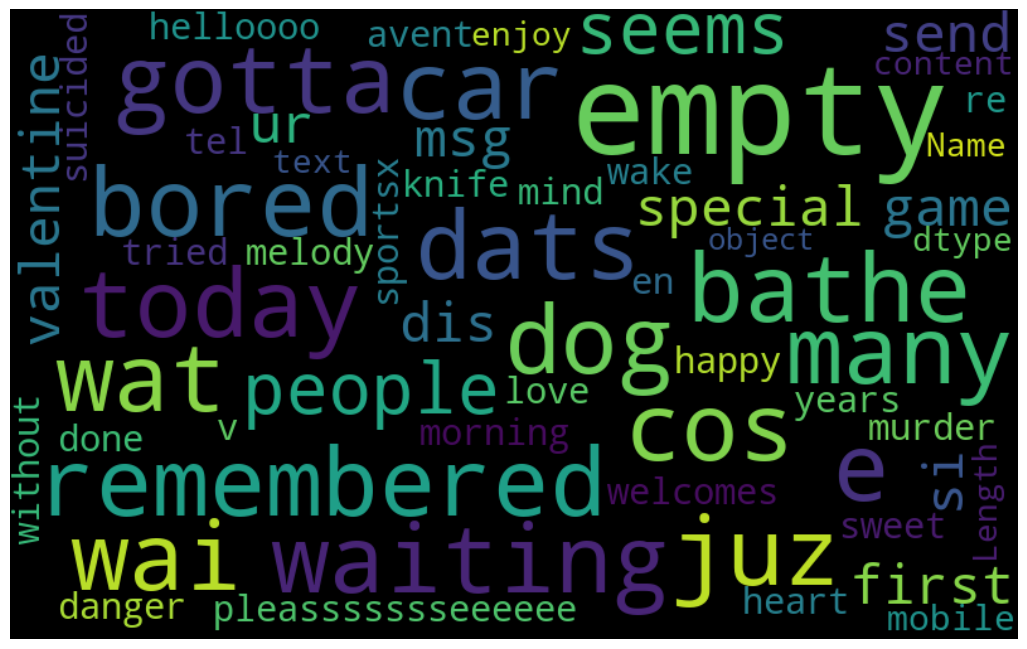

In [78]:
# REQUIREMENT 1 0f 3 Data Visualizations
# wordcloud generation
wordcloud = WordCloud(width=800, height=500, random_state=123, max_font_size=100,).generate(str(train_alert_words))
plt.figure(1, figsize=(13, 10))
fig_text = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
def get_user_input():
    #ask if user wants a detailed report
    print("Would you like a detailed report along with the prediction? y or n")
    detailed = input()
    if(detailed.lower().__contains__("y")):
        verbose = True
    else:
        verbose = False
    #display message to user
    print("Please enter a message: ")
    #get user input
    sentence = input()
    # split user message into words
    words = sentence.lower().split()
    predict_alert(words, verbose)

In [80]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
get_user_input()

Would you like a detailed report along with the prediction? y or n
